# Разведывательный анализ данных (EDA)
### Итак, вспомним основные цели EDA:

* Сформулировать предположения и гипотезы для дальнейшего построения модели.
* Проверить качество данных и очистить их, если это необходимо.
* Определиться с параметрами модели.
* Последовательность проведения анализа зависит от задачи. EDA — это своего рода искусство!

## Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sns

%matplotlib inline
%pylab inline

pd.set_option('display.max_rows', 50) # show more lines 
pd.set_option('display.max_columns', 50) # show more columns

Populating the interactive namespace from numpy and matplotlib


In [2]:


students = pd.read_csv('stud_math.csv')
display(students.head(10))
students.info()
# Сопоставить количество колонок с списоком описания каждой колонки
len(students.columns)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granul

30

In [3]:
# Functions for EDA

#First put headers and descriptions into dictionary to plot with corresponding titles 
# START
descr = '''school — аббревиатура школы, в которой учится ученик\n
sex — пол ученика ('F' - женский, 'M' - мужской)\n
age — возраст ученика (от 15 до 22)\n
address — тип адреса ученика ('U' - городской, 'R' - за городом)\n
famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)\n
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)\n
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)\n
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)\n
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)\n
schoolsup — дополнительная образовательная поддержка (yes или no)\n
famsup — семейная образовательная поддержка (yes или no)\n
paid — дополнительные платные занятия по математике (yes или no)\n
activities — дополнительные внеучебные занятия (yes или no)\n
nursery — посещал детский сад (yes или no)\n
higher — хочет получить высшее образование (yes или no)\n
internet — наличие интернета дома (yes или no)\n
romantic — в романтических отношениях (yes или no)\n
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)\n
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)\n
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)\n
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)\n
absences — количество пропущенных занятий\n
score — баллы по госэкзамену по математике\n
granular — категориальный признак для studytime '''

dict_titles = {}
for row in descr.split('\n'):
    row = row.split(' — ')
    if len(row) > 1:
        header = row[0]
        title = row[1]
        dict_titles[header] = title
#FINISH


# Create func to plot features
def display_plot(column:pd.Series, data:pd.DataFrame = students, plot_type:str = "bar"):
    '''Display plot of column 

    Args:
     1. column 
     2. data = students - default
     3. plot_type = "bar","boxplot" 

    '''
    if plot_type == 'bar':
        graphic = data[column].value_counts().reset_index()
        graphic.plot(x = 'index',
                y = column,
                kind = 'bar',
                grid = True, 
                title =  dict_titles[column].capitalize())
    elif plot_type == 'boxplot':
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score', data=data.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])], ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column +  ' \n '+ dict_titles[column].capitalize())
        plt.show()

# Encode string values into numeric ones 
def nominate_to_numeric_feature(column : pd.Series) -> pd.Series:
    """Converts nominative features to numeric 
    
    Args:
     1. find mean 
     2. find median
     3. compare and replace None or Nan values to mean/median
     4. 
     """
    mean = col.mean()
    median = col.median()
    col.apply(lambda x: None if pd.isnull(x) else None if pd.isna(x) else x)
    return col

* 13 колонок с числовыми данными
* 17 колонок со строковыми значениями 
### Столбцы с пропущенными значениями 
* address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime,     
failures, schoolsup,famsup,paid,activities, nursery, (studytime/ granular),higher, internet,romantic,famrel,freetime,goout,health,absences
* в Описании говорится о 29 колонках, но можно заметить, что в по существу колонок 30, лишней является 'studytime, granular' - заменим ее на granular - без описания


# Описание датасета
## Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


### Рассмотрим, какие данные хранятся в файле:

In [4]:
# Rename columns
students.columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']
print(len(students.columns))

30


In [5]:
# describe numeric columns
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [6]:
# desribe columns with string values
students.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


## Признаки имеют следующие типы:
* номинативные признаки: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic;
* количественные: age, absences, score
* ранговые: Medu, Fedu, traveltime, studytime, famrel, freetime, goout, healthy
* отдельно можно посмотреть признак absences

# Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
3. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
4. Оцените количество уникальных значений для номинативных переменных.
5. По необходимости преобразуйте данные
6. Проведите корреляционный анализ количественных переменных
7. Отберите не коррелирующие переменные.
8. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

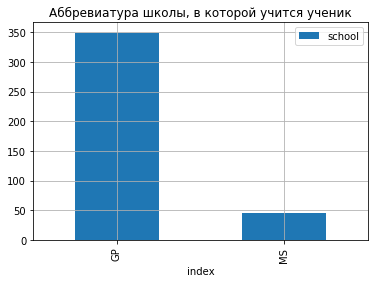

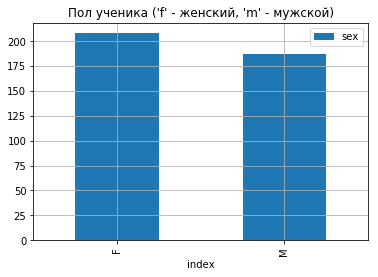

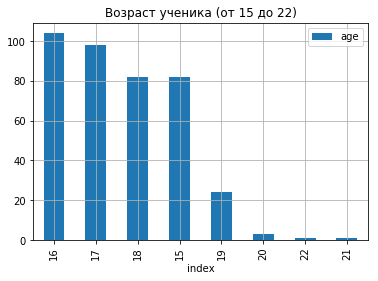

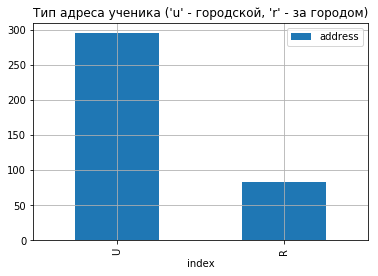

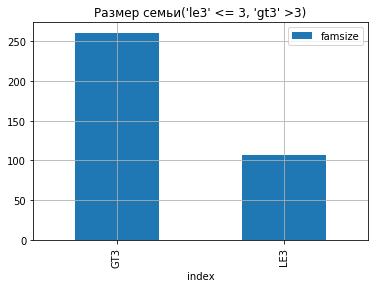

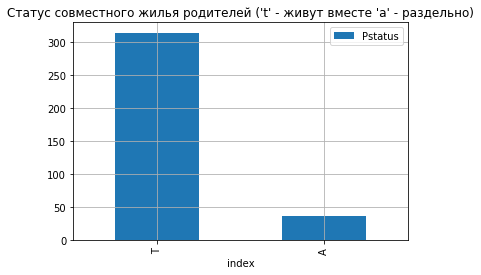

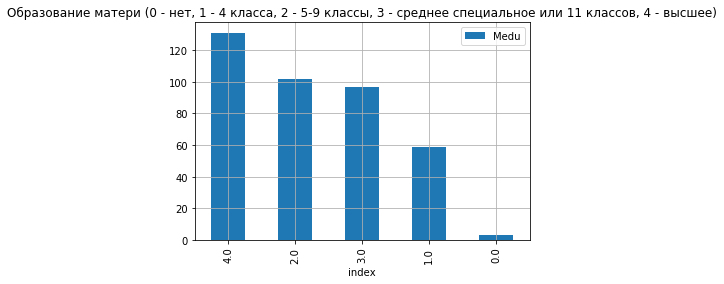

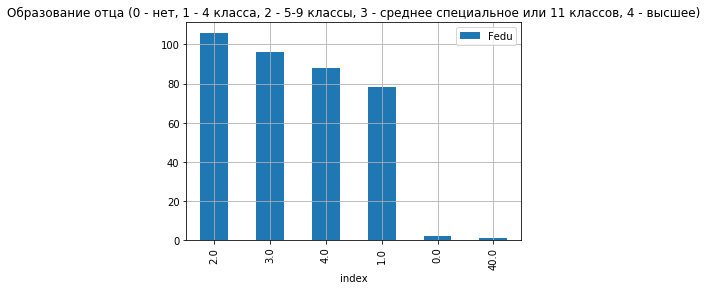

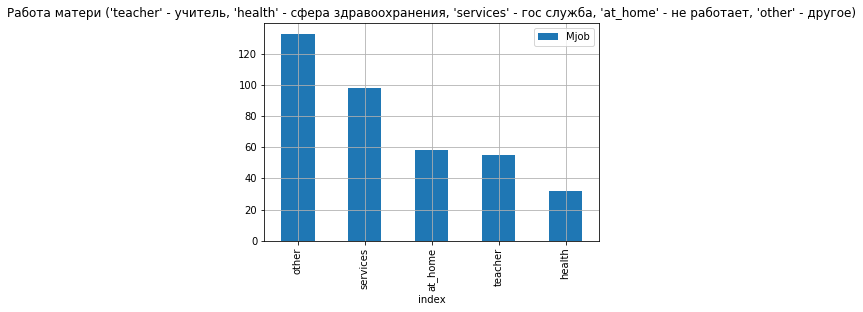

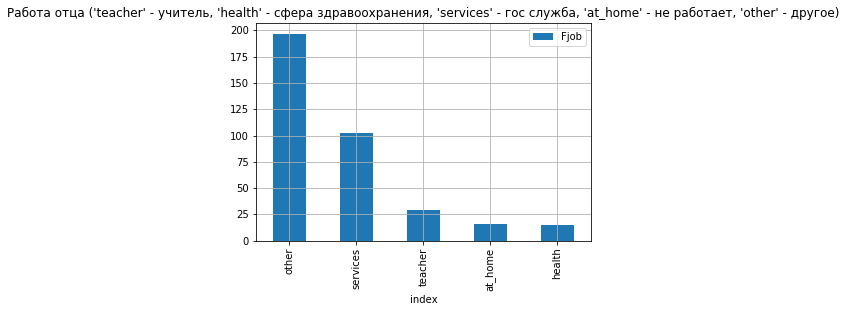

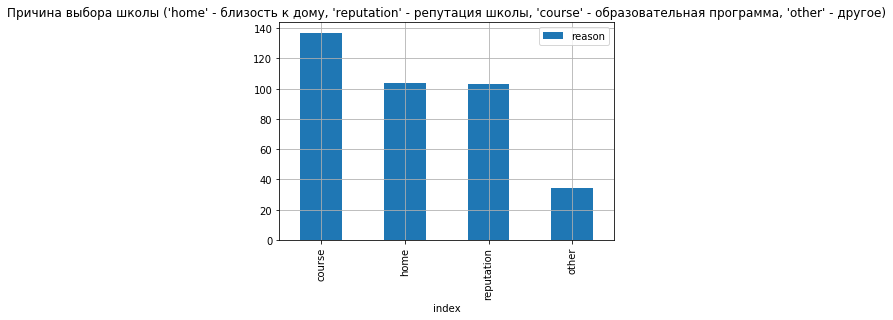

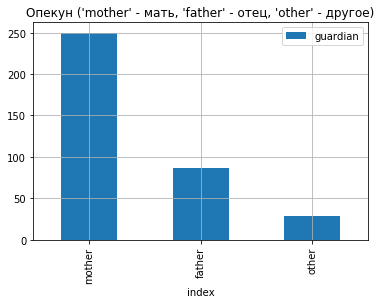

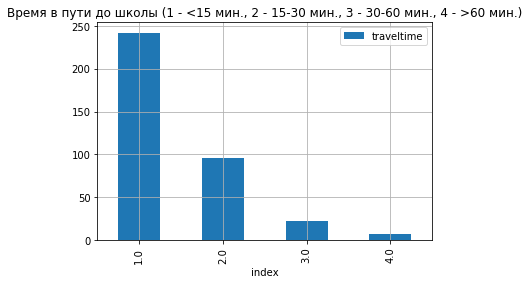

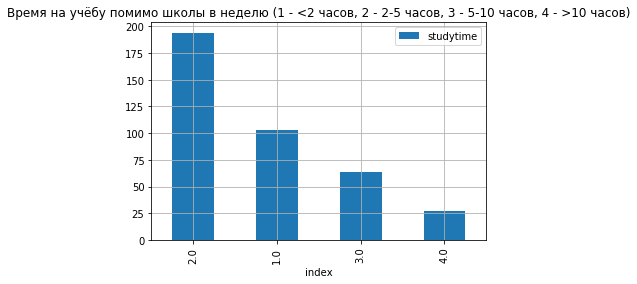

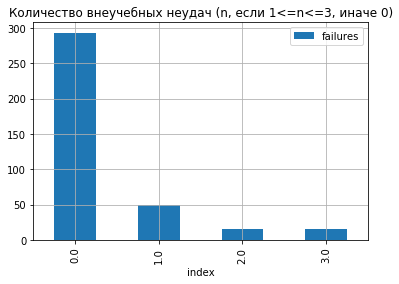

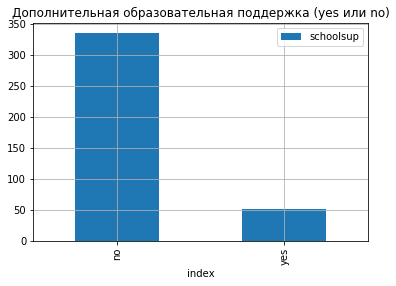

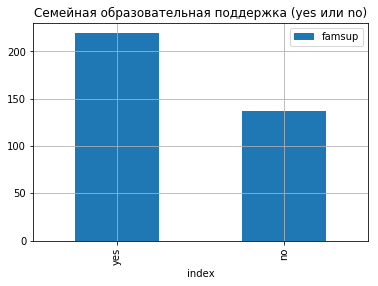

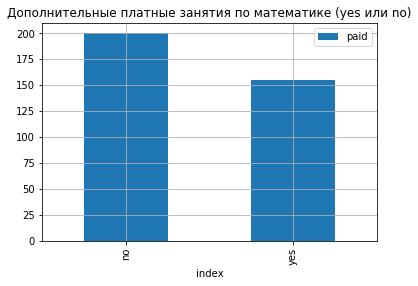

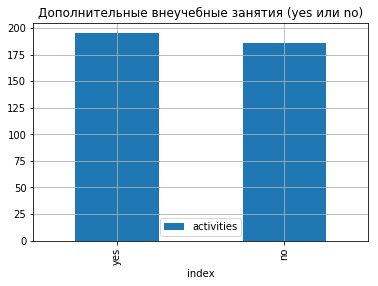

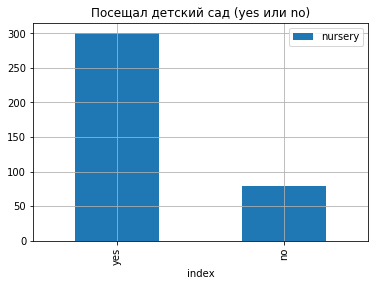

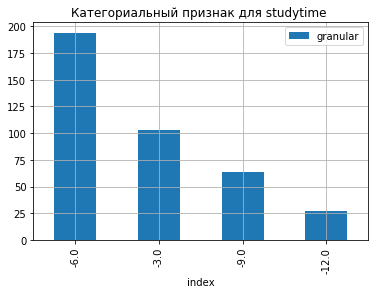

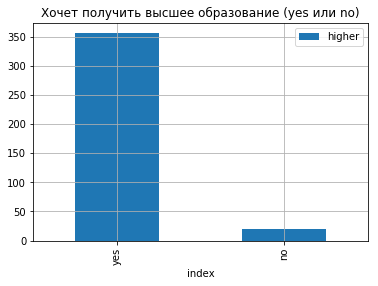

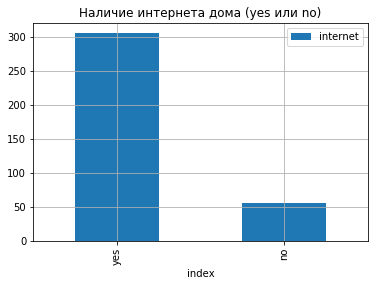

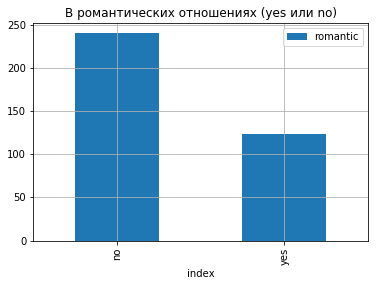

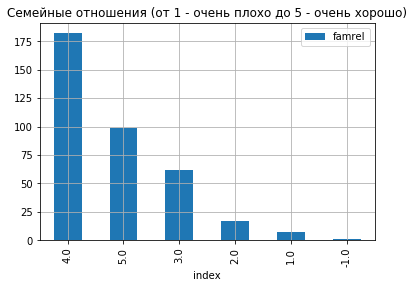

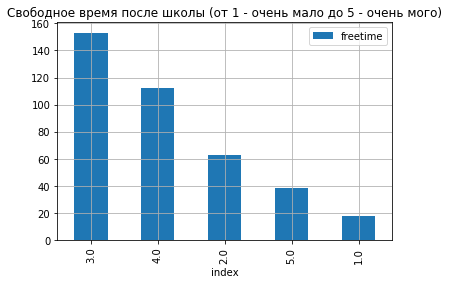

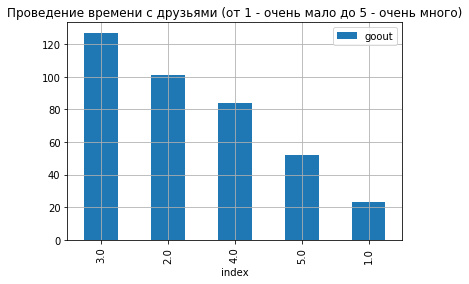

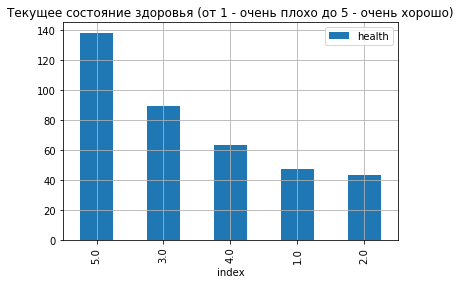

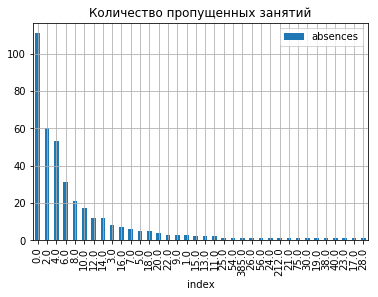

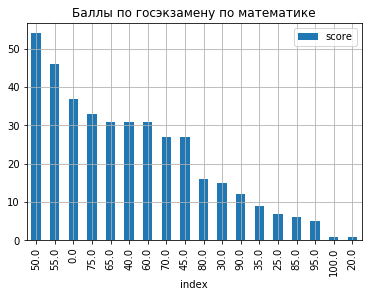

In [7]:

for column in students.columns:
    display_plot(column)


* Убрать пропуски
* Проанализировать Fedu, Medu
* Убрать неинформативный признак granular
* Убрать выброс в famrel
* Проверить влияет ли дет-сад на балл в школе, при этом образование родителей
* Проверить влияние пропусков на балл
* Преобразовать в числа
* Понять положение школ, если до школы < 15 мин и ученик из загорода
* Влияние занятия вне школы на балл
* Разбить на шкалы признак absences
* Разбить на шкалы признак failures

## Выводы:
* Выбросы в Fedu, famrel
* Убрать неиформативный признак granular
* Признак failures сгруппировать с двумя значениями 0 и 1 для случая больше 0

In [8]:


#Fedu change value 40 to 4
students.loc[students.Fedu == 40, 'Fedu'] = 4

# replace mistaken value
students.loc[students.famrel == -1, 'famrel'] = 1

# change feature called failures
students.loc[students.failures > 0, 'failures'] = 1

# Drop non-informative feature
students = students.drop('granular',axis=1)

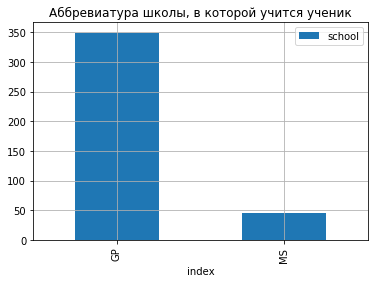

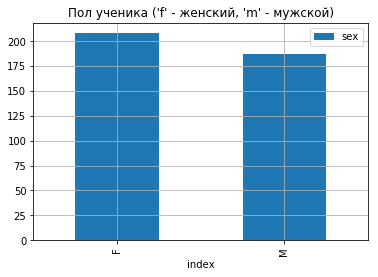

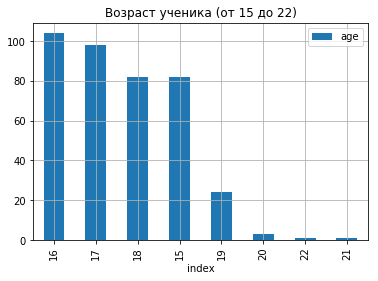

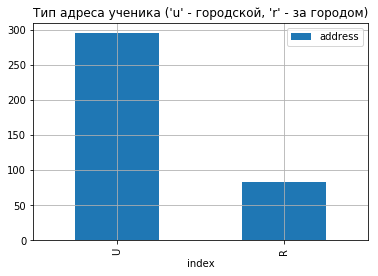

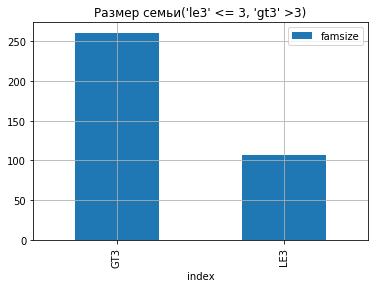

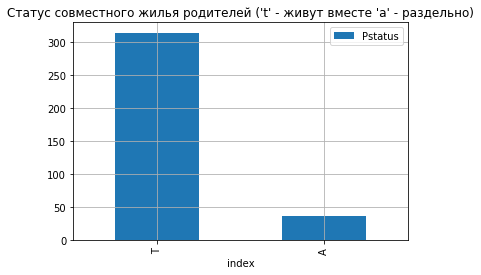

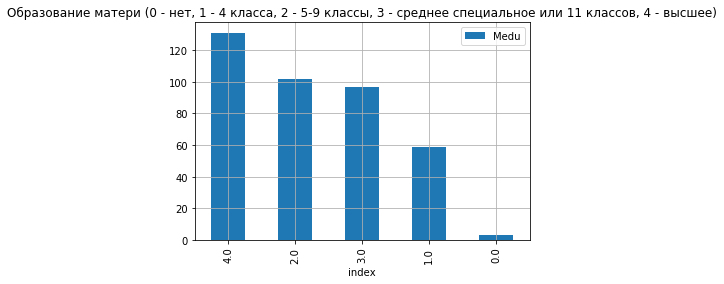

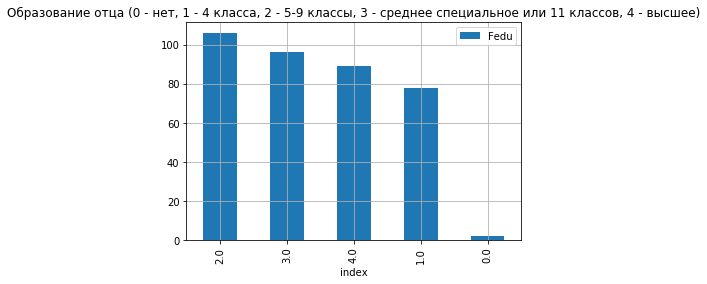

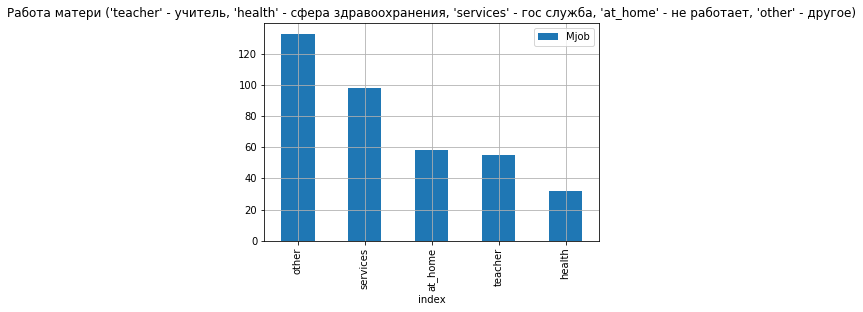

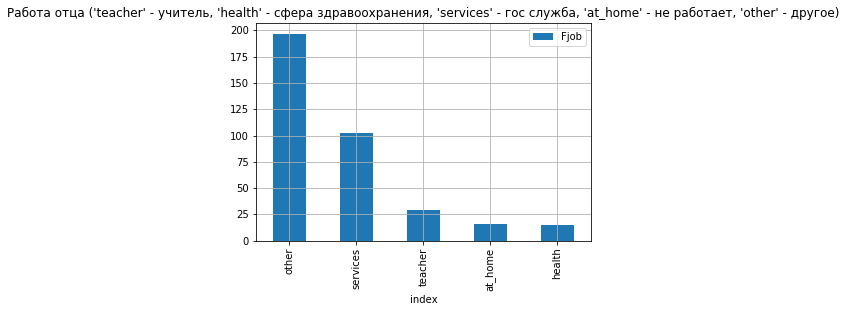

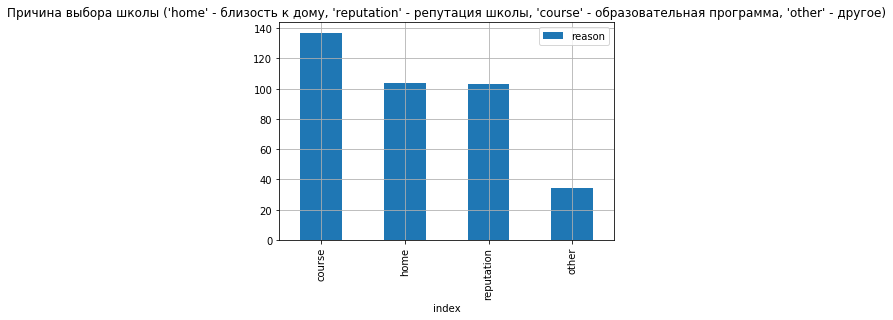

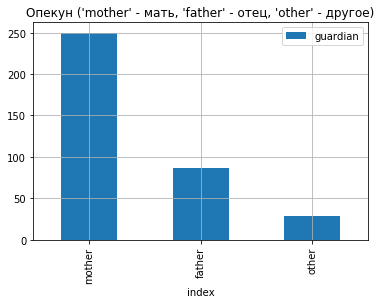

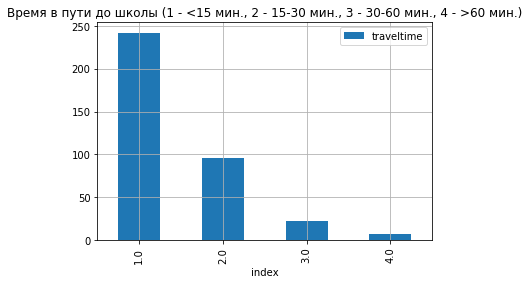

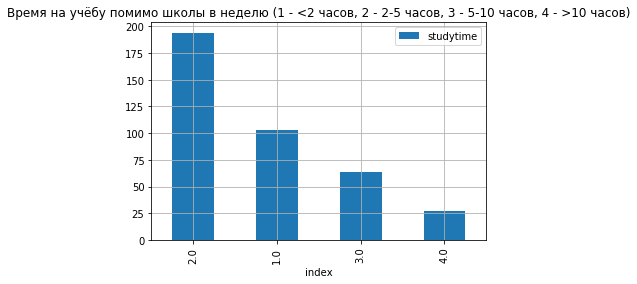

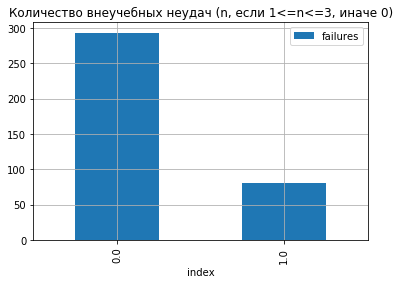

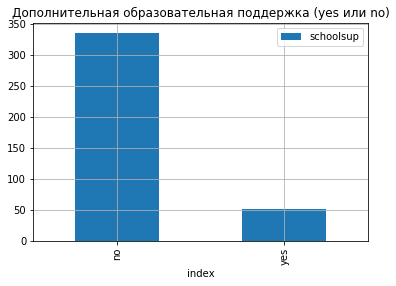

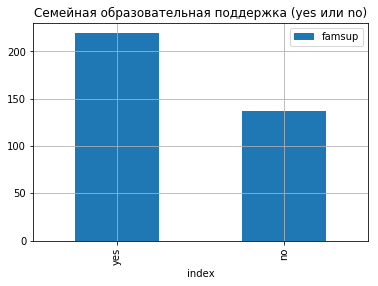

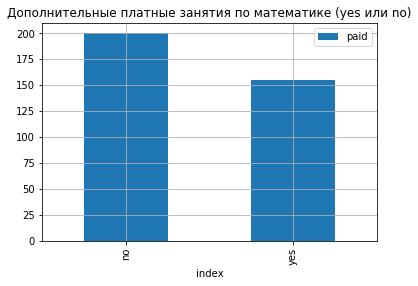

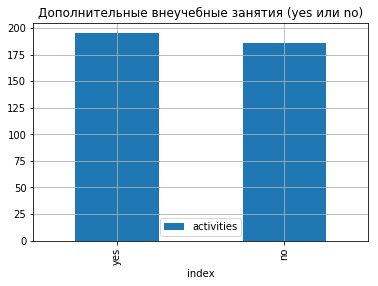

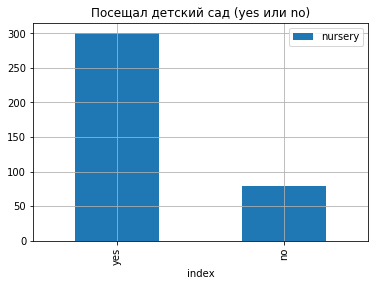

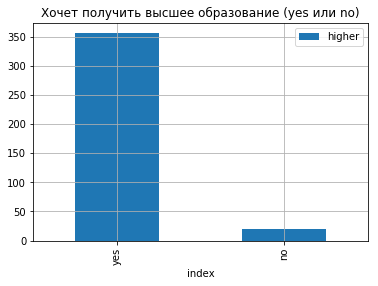

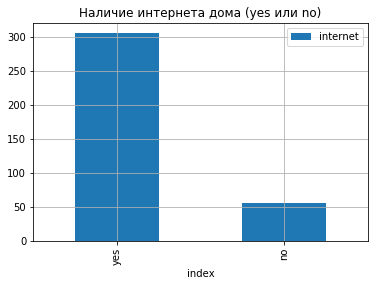

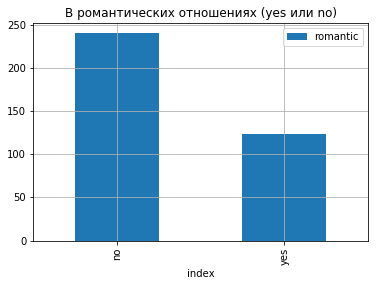

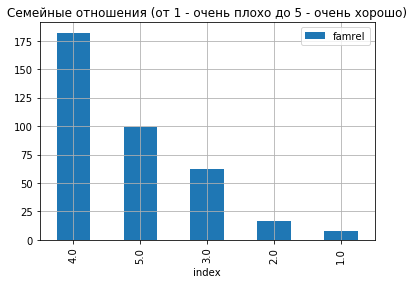

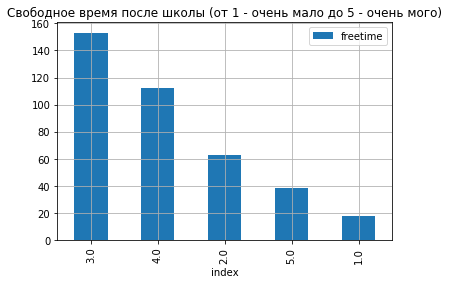

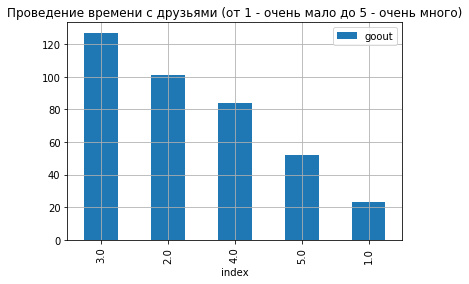

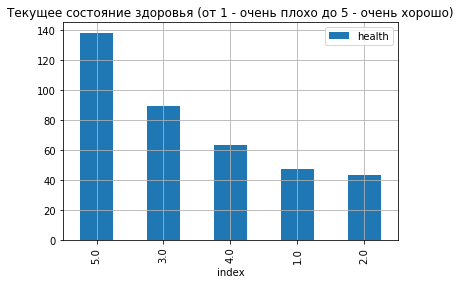

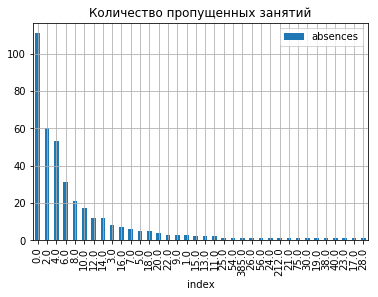

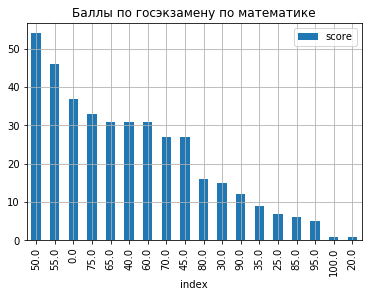

In [9]:
#Plot again to see the changes
for column in students.columns:
    display_plot(column)

In [21]:
# cut off outliers for values age, absences, score
for column in ['age','absences', 'score']:
    
    q1 = students[column].quantile(q=0.25)
    
    q3 = students[column].quantile(q=0.75)
    
    # InterQuartile Range
    IQR = q3 - q1
    print('=========')
    print(f'Для колонки: {column}')
    print(f'25-% квартиль: {q1}')
    print(f'75-% квартиль: {q3}')
    print(f'IQR: {IQR}')
    print(f'Границы разборса: ({ q1 - 1.5*IQR },{ q3 + 1.5*IQR })')
    # remove outliers:
    students = students[(students[column] >= q1 - 1.5*IQR) & (students[column] <= q3 + 1.5*IQR)]


Для колонки: age
25-% квартиль: 16.0
75-% квартиль: 18.0
IQR: 2.0
Границы разборса: (13.0,21.0)
Для колонки: absences
25-% квартиль: 0.0
75-% квартиль: 8.0
IQR: 8.0
Границы разборса: (-12.0,20.0)
Для колонки: score
25-% квартиль: 40.0
75-% квартиль: 70.0
IQR: 30.0
Границы разборса: (-5.0,115.0)


In [31]:
# convert nominative features to text
dict_nominative = {}

for column in students.describe(include=['O']):
    
    # filling the dictionary data by column
    dict_column = {}
    count = 0

    for value in students[column].unique(): 
        if type(value) != float:
            dict_column[value] = count
            count += 1

    dict_nominative[column] = dict_column

    students[column] = students[column].apply(lambda x: dict_column[x] if type(x) != float else None)


In [35]:
print(dict_nominative)
students.describe()

{&#39;school&#39;: {&#39;GP&#39;: 0, &#39;MS&#39;: 1}, &#39;sex&#39;: {&#39;F&#39;: 0, &#39;M&#39;: 1}, &#39;address&#39;: {&#39;U&#39;: 0, None: 1, &#39;R&#39;: 2}, &#39;famsize&#39;: {None: 0, &#39;GT3&#39;: 1, &#39;LE3&#39;: 2}, &#39;Pstatus&#39;: {&#39;A&#39;: 0, &#39;T&#39;: 1}, &#39;Mjob&#39;: {&#39;at_home&#39;: 0, &#39;health&#39;: 1, &#39;other&#39;: 2, &#39;services&#39;: 3, &#39;teacher&#39;: 4}, &#39;Fjob&#39;: {&#39;teacher&#39;: 0, &#39;other&#39;: 1, &#39;health&#39;: 2, &#39;services&#39;: 3, &#39;at_home&#39;: 4}, &#39;reason&#39;: {&#39;course&#39;: 0, &#39;other&#39;: 1, &#39;home&#39;: 2, &#39;reputation&#39;: 3}, &#39;guardian&#39;: {&#39;mother&#39;: 0, &#39;father&#39;: 1, &#39;other&#39;: 2}, &#39;schoolsup&#39;: {&#39;yes&#39;: 0, &#39;no&#39;: 1}, &#39;famsup&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;paid&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;activities&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;nursery&#39;: {&#39;yes&#39;: 0, &#39;no&#39

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,360.000000,360.000000,360.000000,360.000000,360.000000,322.000000,357.000000,337.000000,344.000000,326.000000,343.000000,330.000000,332.000000,355.000000,341.000000,351.000000,326.000000,323.000000,346.000000,345.000000,342.000000,328.000000,330.000000,334.000000,353.000000,353.000000,345.000000,360.000000,360.000000
mean,0.119444,0.477778,16.622222,0.472222,1.213889,0.900621,2.756303,2.501484,2.142442,1.659509,1.440233,0.378788,1.442771,2.050704,0.196481,0.871795,0.619632,0.427245,0.526012,0.202899,0.043860,0.164634,0.330303,3.946108,3.243626,3.076487,3.562319,4.577778,52.027778
std,0.324762,0.500201,1.229424,0.827323,0.539603,0.299636,1.101325,1.091429,1.254752,1.105518,1.238426,0.603061,0.707988,0.858798,0.397920,0.334795,0.486224,0.495446,0.500046,0.402742,0.205083,0.371417,0.471036,0.915384,0.981430,1.106457,1.386092,4.959957,22.979325
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.500000,55.000000
75%,0.000000,1.000000,18.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,1.000000,1.000000,21.000000,2.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


In [ ]:
# remove correlation features
# fill the passes


In [11]:
students.famsize = students.famsize.apply(lambda x: None if pd.isnull(x) else None if pd.isna(x) else x)
students.famsize

0      None
1       GT3
2       LE3
3       GT3
4       GT3
5       LE3
6       LE3
7       GT3
8       LE3
9      None
10      GT3
11      GT3
12      LE3
13      GT3
14      GT3
15      GT3
16      GT3
17      GT3
18      GT3
19      LE3
20      GT3
21      GT3
22      LE3
23      LE3
24      GT3
       ... 
370     LE3
371     LE3
372     GT3
373     GT3
374     LE3
375     GT3
376     GT3
377     LE3
378     GT3
379     GT3
380     GT3
381     GT3
382     GT3
383     GT3
384     GT3
385     GT3
386     GT3
387     GT3
388     LE3
389     GT3
390     LE3
391     LE3
392     GT3
393     LE3
394     LE3
Name: famsize, Length: 395, dtype: object

Рассматриваемый dataset преобладает студентами из многодетных семей, возможно предположить мотивация данных студентов поступить с наибольшим баллом

In [12]:

students.address = students.address.apply(lambda x: None if pd.isnull(x) else None if pd.isna(x) else x)
pd.DataFrame(students.address.value_counts())

,address
U,295
R,83


Посмотреть сколько многодетных семей живут загородом

In [12]:
pd.DataFrame(students.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [13]:
# Поменять значения Sex на true false
pd.DataFrame(stud.sex.value_counts())


,sex
F,208
M,187


## Интервальные features:
Medu, Fedu, Mjob, Fjob, traveltime, studytime, failures


# Диапазон значений
famrel, freetime, goout, health